In [201]:
import numpy as np
import pandas as pd
import matplotlib . pyplot as plt
import random
%matplotlib inline

#Understanding the Data

In [203]:
from google.colab import files
uploaded = files.upload()

Saving drug200.csv to drug200.csv


In [233]:
def plot_features(trainset, testset=None, spc_feature = None):
  import matplotlib.pyplot as plt
  features = trainset.describe().columns.to_list()
  if testset is None:
    plt.figure (figsize= (35,3))
    j = 1
    while j < len(features):
      for i in features:
        if spc_feature is None:
          ax = plt.subplot(1,len(features),j) #row_num,column_num,possition (0,row_num*column_num)
          plt.hist(trainset[i])
          ax.set_xlabel(i)
          j+=1
        else:
          if i == spc_feature:
            pass
          else:
            ax = plt.subplot(1,len(features)-1,j) #row_num,column_num,possition (0,row_num*column_num)
            ax.scatter(trainset[i], trainset[spc_feature],  color='green')
            ax.set_xlabel(i)
            ax.set_ylabel(spc_feature)
            j+=1
  elif testset is not None:
    plt.figure (figsize= (35,3))
    j = 1
    while j < len(features):
      for i in features:
        if spc_feature == None:
          ax = plt.subplot(1,len(features),j) #row_num,column_num,possition (0,row_num*column_num)
          plt.hist(trainset[i])
          plt.hist(testset[i])
          ax.set_xlabel(i)
          j+=1
        else:
          if i == spc_feature:
            pass
          else:
            ax = plt.subplot(1,len(features)-1,j) #row_num,column_num,possition (0,row_num*column_num)
            ax.scatter(trainset[i], trainset[spc_feature],  color='green')
            ax.scatter(testset[i], testset[spc_feature],  color='red')
            ax.set_xlabel(i)
            ax.set_ylabel(spc_feature)
            j+=1

In [234]:
file_name_dataset = 'drug200.csv'
df = pd.read_csv(file_name_dataset)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [235]:
# One Hot Encoding
def onehot_encode(X):
  return pd.get_dummies(X)
# Label Encoding
def label_encode(X):
  return X.astype('category').cat.codes

In [236]:
#Convert categories to numbers
df['_Sex'] = label_encode(df['Sex'])
df['_BP'] = label_encode(df['BP'])
df['_Cholesterol'] = label_encode(df['Cholesterol'])
df['_Drug'] = label_encode(df['Drug'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,_Sex,_BP,_Cholesterol,_Drug
0,23,F,HIGH,HIGH,25.355,drugY,0,0,0,4
1,47,M,LOW,HIGH,13.093,drugC,1,1,0,2
2,47,M,LOW,HIGH,10.114,drugC,1,1,0,2
3,28,F,NORMAL,HIGH,7.798,drugX,0,2,0,3
4,61,F,LOW,HIGH,18.043,drugY,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,0,1,0,2
196,16,M,LOW,HIGH,12.006,drugC,1,1,0,2
197,52,M,NORMAL,HIGH,9.894,drugX,1,2,0,3
198,23,M,NORMAL,NORMAL,14.020,drugX,1,2,1,3


In [237]:
df.describe()

,Age,Na_to_K,_Sex,_BP,_Cholesterol,_Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,16.084485,0.520000,0.910000,0.485000,2.870000
std,16.544315,7.223956,0.500854,0.821752,0.501029,1.372047
min,15.000000,6.269000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,10.445500,0.000000,0.000000,0.000000,2.000000
50%,45.000000,13.936500,1.000000,1.000000,0.000000,3.000000
75%,58.000000,19.380000,1.000000,2.000000,1.000000,4.000000
max,74.000000,38.247000,1.000000,2.000000,1.000000,4.000000


In [238]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2).highlight_null(color='#f1f1f1')

<ipython-input-238-d65b0c965d28>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Age,Na_to_K,_Sex,_BP,_Cholesterol,_Drug
Age,1.00,-0.06,0.10,0.05,-0.07,-0.00
Na_to_K,-0.06,1.00,-0.13,-0.15,0.01,0.59
_Sex,0.10,-0.13,1.00,-0.01,-0.01,-0.10
_BP,0.05,-0.15,-0.01,1.00,-0.14,0.37
_Cholesterol,-0.07,0.01,-0.01,-0.14,1.00,0.06
_Drug,-0.00,0.59,-0.10,0.37,0.06,1.00


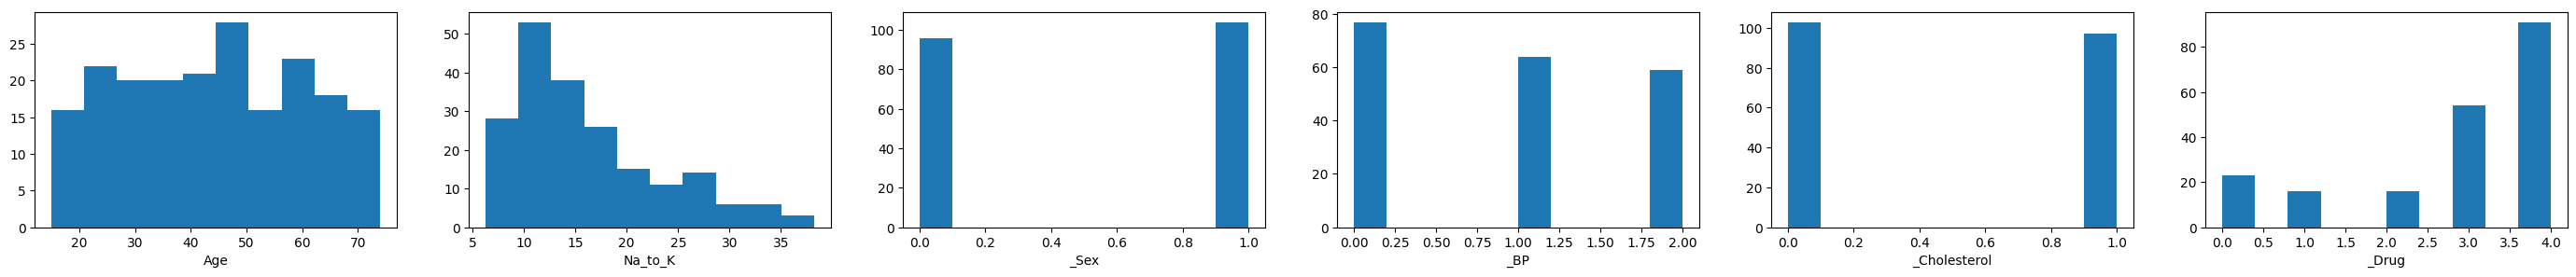

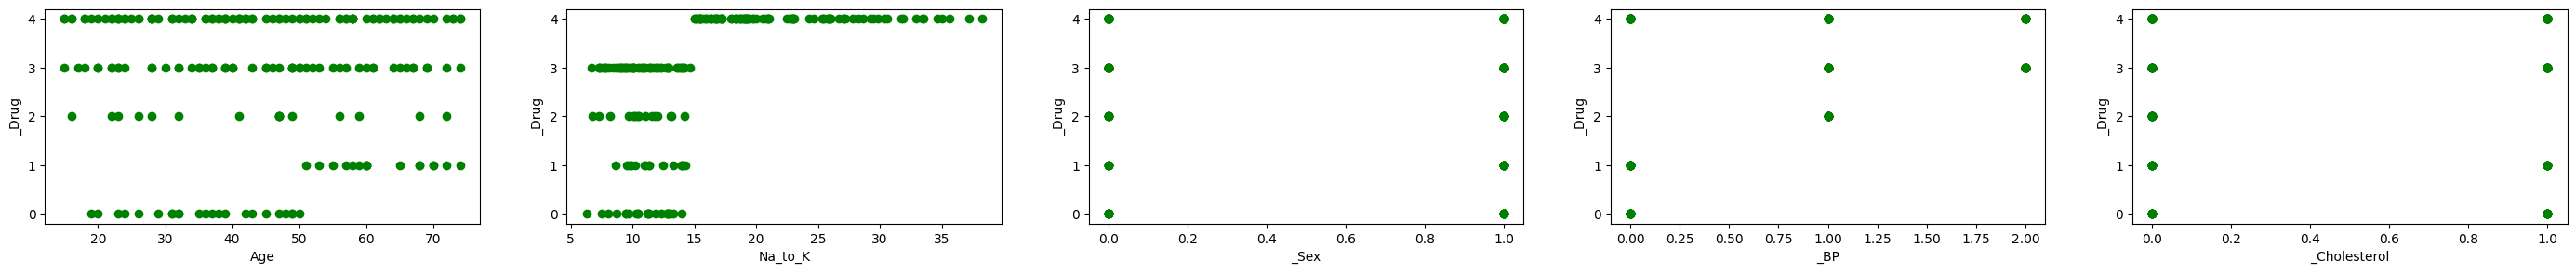

In [239]:
plot_features(df)
plot_features(df, spc_feature = '_Drug')

In [240]:
#select some features using for regression.
features_list = df.columns
data = df[features_list]
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,_Sex,_BP,_Cholesterol,_Drug
0,23,F,HIGH,HIGH,25.355,drugY,0,0,0,4
1,47,M,LOW,HIGH,13.093,drugC,1,1,0,2
2,47,M,LOW,HIGH,10.114,drugC,1,1,0,2
3,28,F,NORMAL,HIGH,7.798,drugX,0,2,0,3
4,61,F,LOW,HIGH,18.043,drugY,0,1,0,4


#Creating train and test dataset

number of rows in df:  200
number of values in msk:  200
number of True in msk:  160 ratio:  0.8
number of False in msk:  40 ratio:  0.2


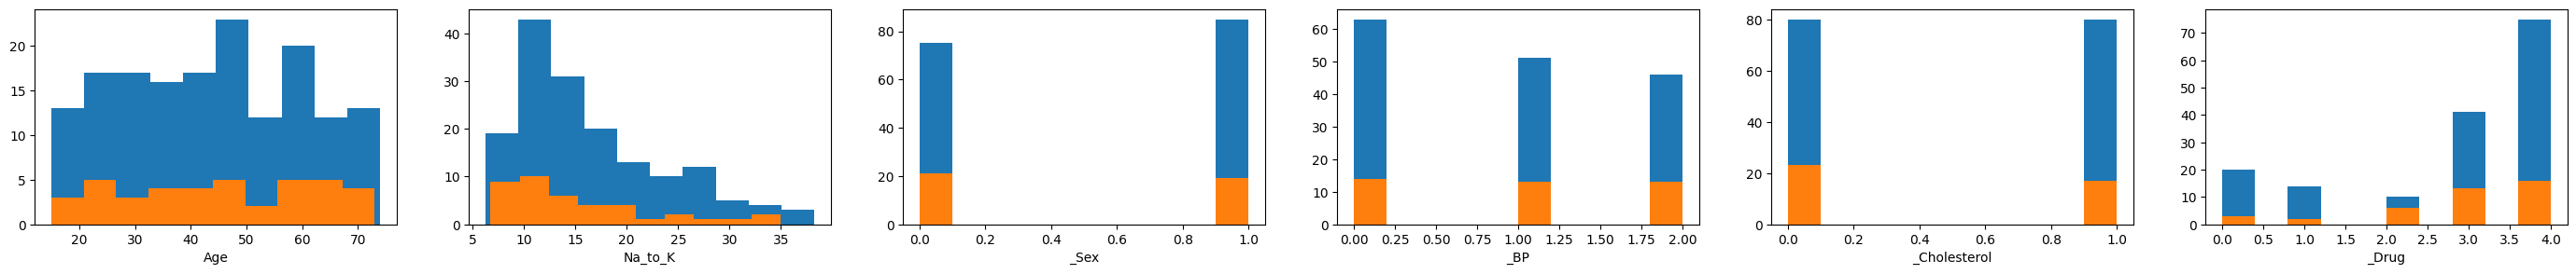

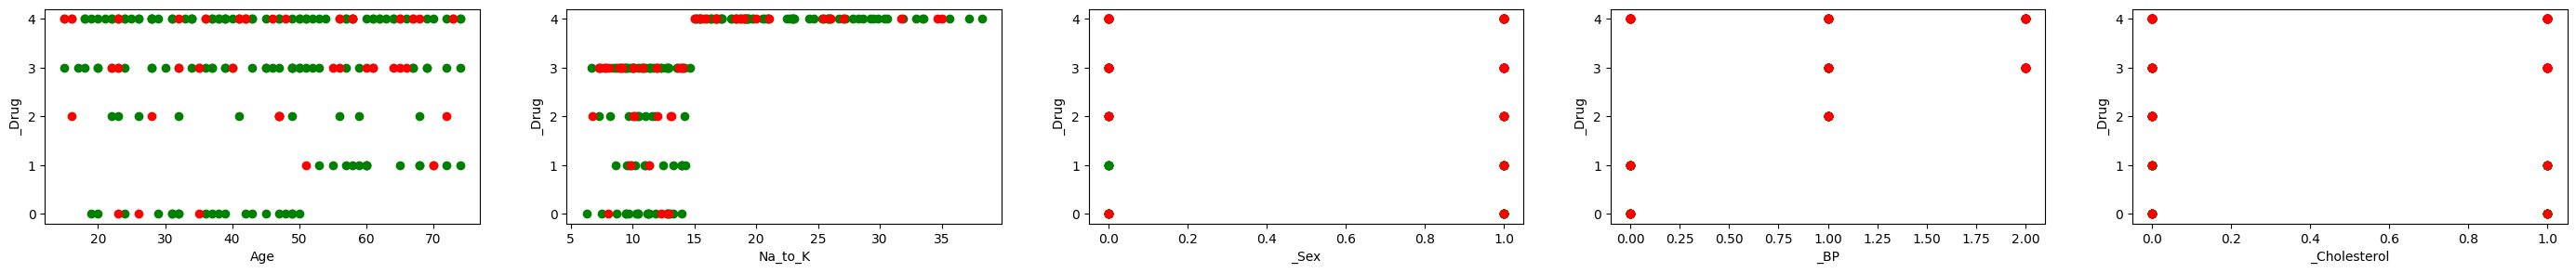

In [241]:
#Create 2 sets: train set and test set
#create a mask to select random rows using np.random.rand() function
msk = np.random.rand(len(data)) < 0.8 #select random rows (< 80% of len(df))
print('number of rows in df: ',len(data))
print('number of values in msk: ',len(msk))
print('number of True in msk: ',msk.sum(),'ratio: ',msk.sum()/len(msk))
print('number of False in msk: ',(~msk).sum(),'ratio: ',(~msk).sum()/len(msk))
#np.random.rand(n) => n random values [0,1) => condition: random values > 0.8 => True
train = data[msk] #cdf of True
test = data[~msk] #~msk: True => False and False => True, cdf[~msk]: cdf of False

#Plot features
plot_features(train[features_list], test[features_list])
plot_features(train[features_list], test[features_list] ,spc_feature = '_Drug')

#Modeling

**Gaussian Distribution**

$f(x) = \frac{1}{σ\sqrt{2π}}e^{-\frac{1}{2σ^2}(x-μ)^2}$

$-∞<x<∞$

$μ$: mean

$σ^2$: variance

$\left\{
\begin{array}{cc}
P(C_j|X)=\frac{P(X|C_j)*P(C_j)}{P(X)} \\
P(X|C_j) = \prod P(X_i|C_j) \\
P(X)=∑P(C_j).P(X_i|C_j)
\end{array}
\right. $
$\rightarrow P(C_j|X)=\frac{P(C_j)*\prod P(X_i|C_j)}{∑P(C_j).P(X_i|C_j)}$
$\rightarrow P(C_j|X) = ??? \Leftrightarrow \left\{
\begin{array}{cc}
P(X_i|C_j) = ??? \\
P(C_j) = ???
\end{array}
\right. $

For discrete variable: **Bernoulli Naïve Bayes Classifier**
$P(X=x|C=c) = \frac{P(C=c \cap X=x)}{P(C=c)}$

For continuous variable(numerical variable): **Gaussian Naïve Bayes Classifier**
$P(X=x|C=c) = \frac{1}{σ_c\sqrt{2π}}e^{-\frac{1}{2σ^2_c}(x-μ_c)^2}$

##Classification

In [243]:
class Classifier:
  def __init__(self,data,Y_variable):
    self._data = data
    self._Y_variable = Y_variable
    self.Data_preparation()

  def Data_preparation(self):
    if self._data[self._Y_variable].dtype == 'O':
      self.discrete_features = [feature for feature in self._data.columns if self._data[feature].dtype == 'O']
      discrete_new_df = self._data[self.discrete_features]
      self.continuous_features = [feature for feature in self._data.columns if self._data[feature].dtype != 'O']
      continuous_new_df = self._data[self.continuous_features + [self._Y_variable]]
    else:
      self.discrete_features = [feature for feature in self._data.columns if self._data[feature].dtype == 'O']
      discrete_new_df = self._data[self.discrete_features + [self._Y_variable]]
      self.continuous_features = [feature for feature in self._data.columns if self._data[feature].dtype != 'O']
      continuous_new_df = self._data[self.continuous_features]

    #Extracting discrete_features
    result = discrete_new_df.copy()
    for feature in discrete_new_df.columns:
      if feature == self._Y_variable:
        P_feature = []
        for i in discrete_new_df[self._Y_variable]:
          P_feature.append(sum(discrete_new_df[self._Y_variable]==i)/len(discrete_new_df))
        result['P_'+feature] = P_feature
      else:
        if discrete_new_df[feature].dtype == 'O':
          P_feature = []
          for row_id in range(len(discrete_new_df)):
            df_f = discrete_new_df.iloc[row_id:row_id+1]
            P_f_Y = sum((discrete_new_df[feature] == df_f[feature].values[0]) & (discrete_new_df[self._Y_variable] == df_f[self._Y_variable].values[0]))
            P_Y = sum(discrete_new_df[self._Y_variable] == df_f[self._Y_variable].values[0])
            P_feature.append(P_f_Y/P_Y)
          result['P_'+feature+'_'+self._Y_variable] = P_feature
    self.discrete_table = result.drop_duplicates()

    #Extracting continuous_features
    mean_var_list = []
    columns_name = []
    for feature in list(filter(lambda item: item != self._Y_variable, continuous_new_df.columns)):
      columns_name.append(feature+'_mean')
      mean_var_list.append(continuous_new_df.groupby(self._Y_variable)[feature].mean().values)
      columns_name.append(feature+'_variance')
      mean_var_list.append((continuous_new_df.groupby(self._Y_variable)[feature].var(ddof=0).values))
    self.mean_var_table = pd.DataFrame(mean_var_list).transpose()
    self.mean_var_table.columns = columns_name
    self.mean_var_table[self._Y_variable] = continuous_new_df[self._Y_variable].unique().tolist()

    return self.discrete_features, self.discrete_table, self.continuous_features, self.mean_var_table

  def pedict(self, test_data) :
    new_data = {}
    #Extracting discrete_features
    discrete_data = test_data[list(filter(lambda item: item != self._Y_variable, self.discrete_features))]
    for feature in discrete_data.columns:
      P_feature = []
      for row in range(len(discrete_data)):
        P_row = {}
        for label in test_data[self._Y_variable].unique():
          for f in test_data[feature].unique():
            if sum((self.discrete_table[feature] == f) & (self.discrete_table[self._Y_variable] ==label)) != 0:
              P = (self.discrete_table[(self.discrete_table[feature] == f) & (self.discrete_table[self._Y_variable] ==label)]['P_'+feature+'_'+self._Y_variable].values[0]) + 1/len(self._data)
            else:
              P = 1/len(self._data)
            P_row[label] = P
        P_feature.append(P_row)
      new_data[feature] = P_feature

    #Extracting continuous_features
    continuous_data = test_data[self.continuous_features]
    for feature in list(filter(lambda item: item != self._Y_variable, continuous_data.columns)):
      P_feature = []
      for row in range(len(continuous_data)):
        P_row = {}
        for label in test_data[self._Y_variable].unique():
          mean = self.mean_var_table[self.mean_var_table[self._Y_variable]==label][feature+'_mean'].values[0] + 1/len(self._data)
          val = self.mean_var_table[self.mean_var_table[self._Y_variable]==label][feature+'_variance'].values[0] + 1/len(self._data)
          x = continuous_data[feature].iloc[row]
          P = (1/(np.sqrt(val)*np.sqrt(2*np.pi)))*(np.exp((-(x-mean)**2)/(2*val)))
          P_row[label] = P
        P_feature.append(P_row)
      new_data[feature] = P_feature

    #Creating dataframes used for probability calculation
    #For Y variable (label)
    P_Y_ = pd.DataFrame(self.discrete_table.groupby(self._Y_variable)['P_'+self._Y_variable].mean()).transpose()
    P_Y = pd.DataFrame(np.repeat(P_Y_.to_numpy(), test_data.shape[0], axis=0), columns=P_Y_.columns)
    #For X variable (features)
    X_C = {}
    for feature in test_data.columns[:-1]:
      X_C['P_'+feature+'_'+Y_variable] = pd.DataFrame(new_data[feature])
    #Calculating conditional probability
    numerator = P_Y
    denominator = 0
    for x in X_C.keys():
      numerator *= X_C[x]
      denominator += (X_C[x]*P_Y)
    result = numerator/denominator
    #Prediction
    predict = test_data.copy()
    Y_hat = []
    for row in range(len(result)):
      Y_hat.append(result.iloc[row].idxmax())
    predict[self._Y_variable+'_hat'] = Y_hat
    return predict

In [244]:
train_data = train[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']].reset_index(drop=True)
test_data = test[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']].reset_index(drop=True)
Y_variable = 'Drug'

#Modeling
model = Classifier(train_data,Y_variable)

#Prediction
result1 = model.pedict(train_data)
#Evaluate classifier model for train test
sum([(result1.iloc[row]['Drug'] == result1.iloc[row]['Drug_hat']) for row in range(len(result1))])/len(result1)

0.15625

In [245]:
result1.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_hat
0,23,F,HIGH,HIGH,25.355,drugY,drugB
1,28,F,NORMAL,HIGH,7.798,drugX,drugY
2,61,F,LOW,HIGH,18.043,drugY,drugB
3,22,F,NORMAL,HIGH,8.607,drugX,drugY
4,49,F,NORMAL,HIGH,16.275,drugY,drugX


## Evaluating

In [246]:
#Prediction
result = model.pedict(test_data)

#Evaluate classifier model for test test
sum([(result.iloc[row]['Drug'] == result.iloc[row]['Drug_hat']) for row in range(len(result))])/len(result)

0.175

In [247]:
result.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_hat
0,47,M,LOW,HIGH,13.093,drugC,drugX
1,47,M,LOW,HIGH,10.114,drugC,drugX
2,16,F,HIGH,NORMAL,15.516,drugY,drugX
3,32,F,HIGH,NORMAL,25.974,drugY,drugB
4,48,F,LOW,HIGH,15.036,drugY,drugX


#dataset: wine.csv

In [219]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [248]:
file_name_dataset = 'wine.csv'
df = pd.read_csv(file_name_dataset).drop('Unnamed: 0', axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [249]:
#Convert categories to numbers
df['_color'] = label_encode(df['color'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality,_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,1,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,1,1


In [250]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality,_color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.633061,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.482007,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [251]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2).highlight_null(color='#f1f1f1')

<ipython-input-251-d65b0c965d28>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality,_color
fixed acidity,1.00,0.22,0.32,-0.11,0.30,-0.28,-0.33,0.46,-0.25,0.30,-0.10,-0.08,-0.07,-0.49
volatile acidity,0.22,1.00,-0.38,-0.20,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04,-0.27,-0.27,-0.65
citric acid,0.32,-0.38,1.00,0.14,0.04,0.13,0.20,0.10,-0.33,0.06,-0.01,0.09,0.08,0.19
residual sugar,-0.11,-0.20,0.14,1.00,-0.13,0.40,0.50,0.55,-0.27,-0.19,-0.36,-0.04,-0.03,0.35
chlorides,0.30,0.38,0.04,-0.13,1.00,-0.20,-0.28,0.36,0.04,0.40,-0.26,-0.20,-0.18,-0.51
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.20,1.00,0.72,0.03,-0.15,-0.19,-0.18,0.06,0.04,0.47
total sulfur dioxide,-0.33,-0.41,0.20,0.50,-0.28,0.72,1.00,0.03,-0.24,-0.28,-0.27,-0.04,-0.05,0.70
density,0.46,0.27,0.10,0.55,0.36,0.03,0.03,1.00,0.01,0.26,-0.69,-0.31,-0.27,-0.39
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1.00,0.19,0.12,0.02,0.02,-0.33
sulphates,0.30,0.23,0.06,-0.19,0.40,-0.19,-0.28,0.26,0.19,1.00,-0.00,0.04,0.04,-0.49


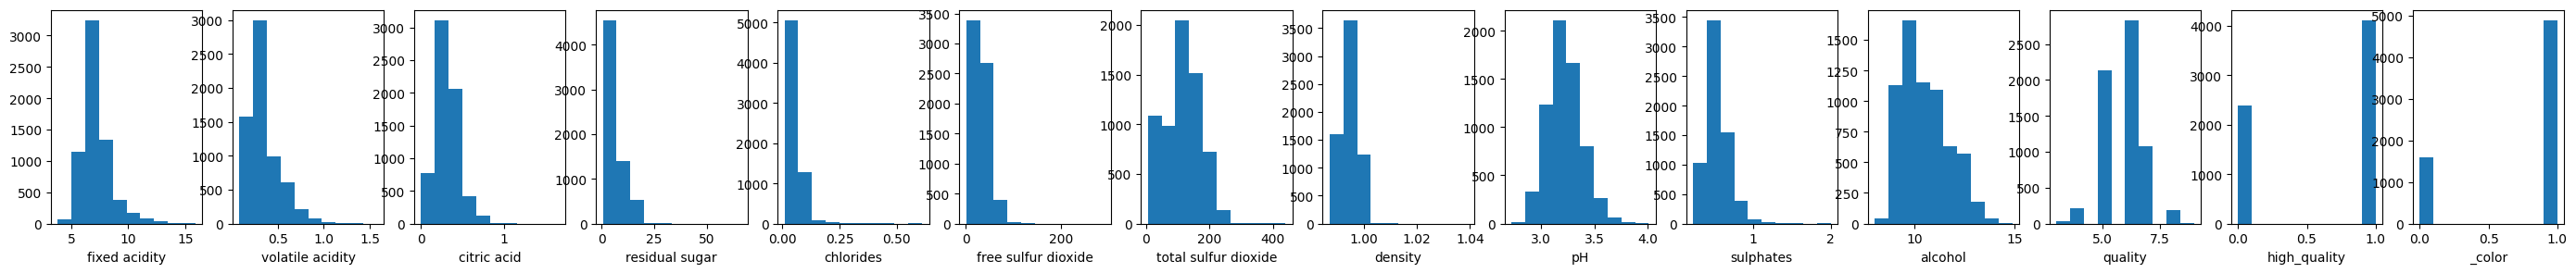

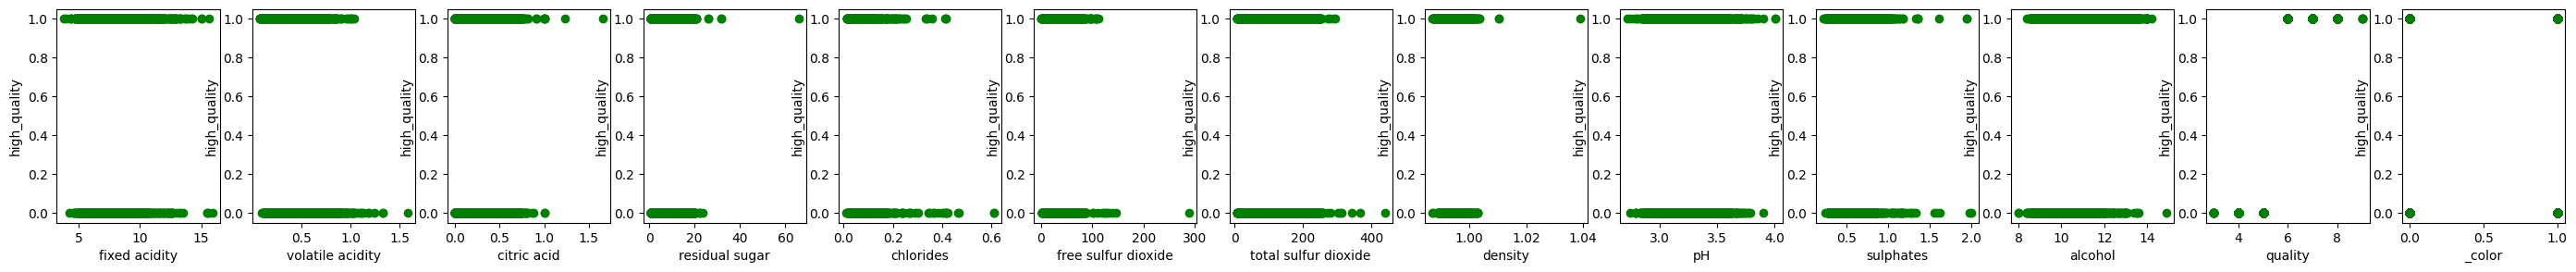

In [252]:
plot_features(df)
plot_features(df, spc_feature = 'high_quality')

In [253]:
#select some features using for regression.
features_list = df.columns
data = df[features_list]
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality,_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,0


number of rows in df:  6497
number of values in msk:  6497
number of True in msk:  5184 ratio:  0.7979067261813144
number of False in msk:  1313 ratio:  0.20209327381868555


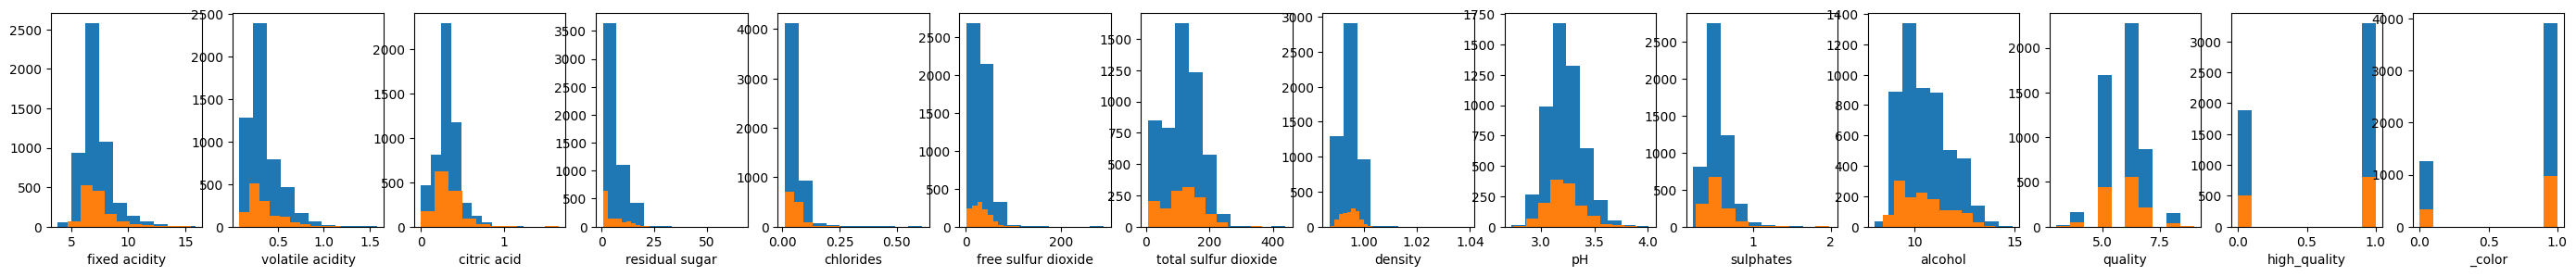

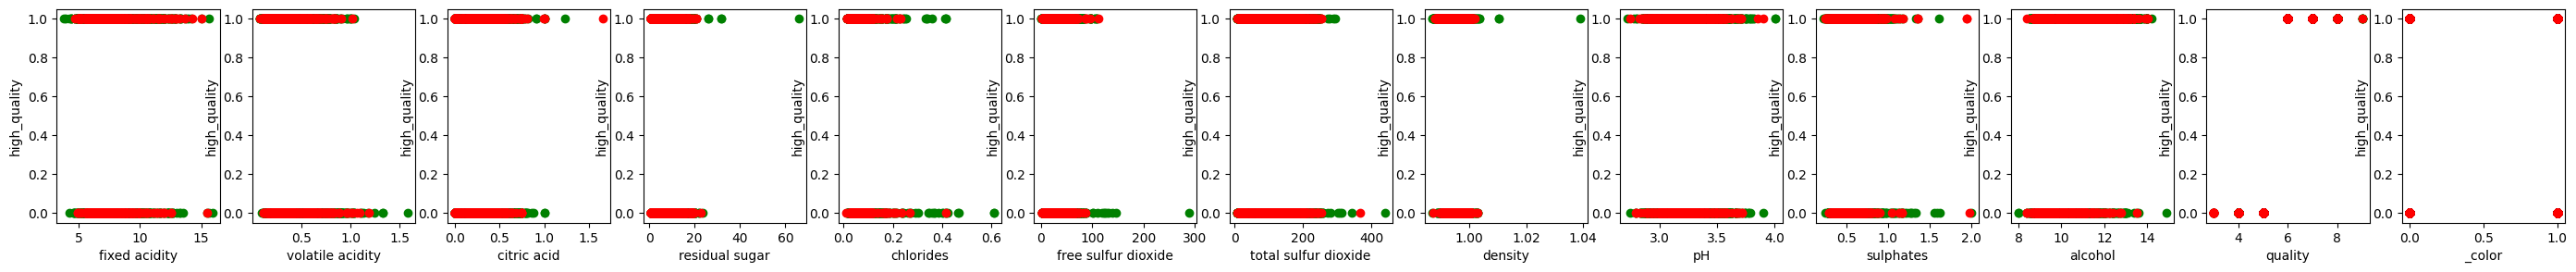

In [254]:
#Create 2 sets: train set and test set
#create a mask to select random rows using np.random.rand() function
msk = np.random.rand(len(data)) < 0.8 #select random rows (< 80% of len(df))
print('number of rows in df: ',len(data))
print('number of values in msk: ',len(msk))
print('number of True in msk: ',msk.sum(),'ratio: ',msk.sum()/len(msk))
print('number of False in msk: ',(~msk).sum(),'ratio: ',(~msk).sum()/len(msk))
#np.random.rand(n) => n random values [0,1) => condition: random values > 0.8 => True
train = data[msk] #cdf of True
test = data[~msk] #~msk: True => False and False => True, cdf[~msk]: cdf of False

#Plot features
plot_features(train[features_list], test[features_list])
plot_features(train[features_list], test[features_list] ,spc_feature = 'high_quality')

In [255]:
train_data = train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                   'pH', 'sulphates', 'alcohol', 'quality', 'color', 'high_quality']].reset_index(drop=True)
test_data = test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                  'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                  'pH', 'sulphates', 'alcohol', 'quality', 'color', 'high_quality']].reset_index(drop=True)
Y_variable = 'high_quality'

#Modeling
model = Classifier(train_data,Y_variable)

#Prediction
result1 = model.pedict(train_data)
#Evaluate classifier model for train test
sum([(result1.iloc[row]['high_quality'] == result1.iloc[row]['high_quality_hat']) for row in range(len(result1))])/len(result1)

0.9855324074074074

In [256]:
result1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality,high_quality_hat
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0,0
1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1,1
2,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,0
3,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,0,0
4,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,0,0


In [257]:
#Prediction
result = model.pedict(test_data)

#Evaluate classifier model for test test
sum([(result.iloc[row]['high_quality'] == result.iloc[row]['high_quality_hat']) for row in range(len(result))])/len(result)

0.9878141660319878

In [259]:
result.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality,high_quality_hat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,0
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0,0
2,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,1,1
3,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,red,1,1
4,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4,red,0,0


In [258]:
result[result['high_quality']!=result['high_quality_hat']]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality,high_quality_hat
126,8.7,0.700,0.24,2.5,0.226,5.0,15.0,0.99910,3.32,0.60,9.0,6,red,1,0
155,10.6,1.020,0.43,2.9,0.076,26.0,88.0,0.99840,3.08,0.57,10.1,6,red,1,0
166,7.8,0.910,0.07,1.9,0.058,22.0,47.0,0.99525,3.51,0.43,10.7,6,red,1,0
332,6.4,0.360,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6,red,1,0
350,6.7,0.240,0.39,2.9,0.173,63.0,157.0,0.99370,3.10,0.34,9.4,6,white,1,0
468,7.4,0.200,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6,white,1,0
509,6.0,0.190,0.71,1.5,0.152,9.0,55.0,0.99270,3.12,0.46,9.8,6,white,1,0
523,6.9,0.210,0.81,1.1,0.137,52.0,123.0,0.99320,3.03,0.39,9.2,6,white,1,0
639,6.6,0.190,0.99,1.2,0.122,45.0,129.0,0.99360,3.09,0.31,8.7,6,white,1,0
650,6.3,0.240,0.74,1.4,0.172,24.0,108.0,0.99320,3.27,0.39,9.9,6,white,1,0
